In [111]:
%matplotlib inline
from numpy import *
from matplotlib.pyplot import *

Todo:

Run ME for foward scattering and get G(tau)
Run DQMC and produce G(tau) for same parameters
Figure out analytic solution for t=0.  Compare with G(tau) from above
Figure out analytic solution for t!=0? Compare with G(tau) from above

In [112]:
[Nk,Nw,beta,g,omega,q0,superconductivity] = load("../data/params.txt.npy")
Nk = int(Nk)
Nw = int(Nw)
print Nw
print beta

iw_fermi = zeros(Nw, dtype=complex)
Nw2 = int(Nw/2.)
for n in range(Nw):
        iw_fermi[n] = 1j*(2.*(n - Nw2) + 1.)*pi/beta
ws = imag(iw_fermi)

200
80.0


In [113]:
eq = load("../data/Geqfft.npy")/beta
print shape(eq)

(31L, 31L, 2L, 2L)


(2.64254481195e-05+2.96568325453e-15j)


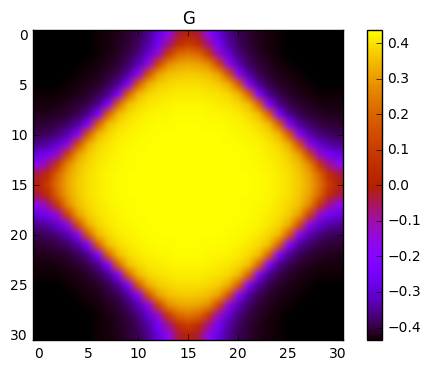

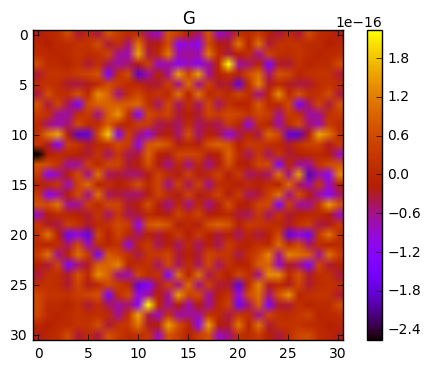

In [114]:
figure()
imshow(real(eq[:,:,0,0]))
colorbar()
title("G")

figure()
imshow(imag(eq[:,:,0,0]))
colorbar()
title("G")

print sum(eq[:,:,0,0])

(2.64254481195e-05+2.96568325453e-15j)


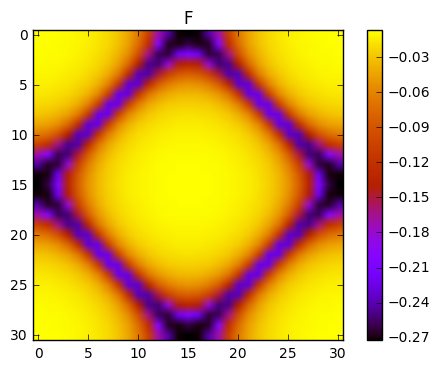

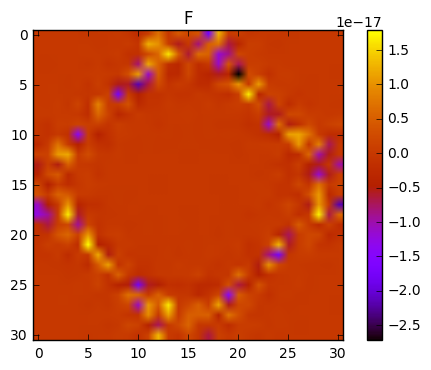

In [115]:
figure()
imshow(real(eq[:,:,0,1]))
set_cmap("gnuplot")
colorbar()
title("F")

figure()
imshow(imag(eq[:,:,0,1]))
colorbar()
title("F")


print sum(eq[:,:,0,0])

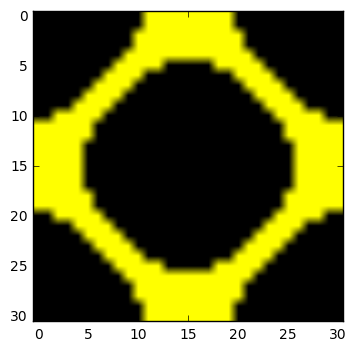

In [116]:
mat = zeros([Nk,Nk])

def Ek(kx,ky):
    return -2*0.25*(cos(kx)+cos(ky))

for i in range(Nk):
    for j in range(Nk):
        kx = -pi + 2*pi/Nk*i + pi/Nk
        ky = -pi + 2*pi/Nk*j + pi/Nk
        if(abs(Ek(kx,ky))<=0.2):
            mat[i,j] = 1.0
            
figure()
imshow(mat)

In [117]:

G = load("../data/G.npy")

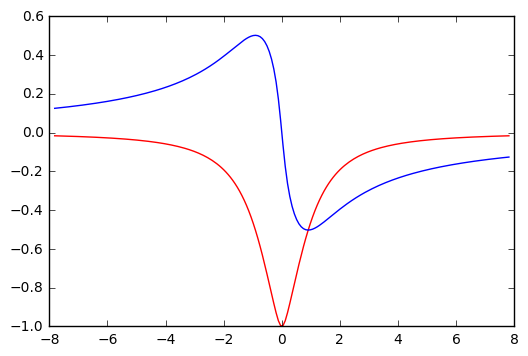

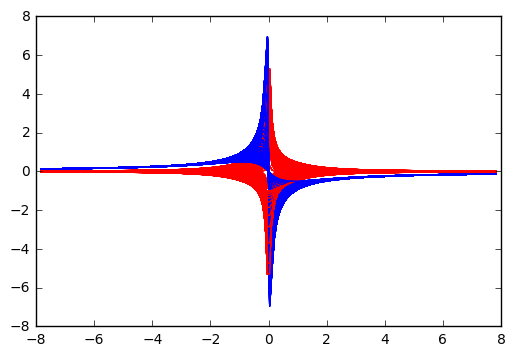

In [118]:
figure()
plot(ws,real(G[0,0,:,0,0]),'r')
plot(ws,imag(G[0,0,:,0,0]),'b')

figure()
for ik1 in range(Nk):
    for ik2 in range(Nk):
        plot(ws,real(G[ik1,ik2,:,0,0]),'r')
        plot(ws,imag(G[ik1,ik2,:,0,0]),'b')

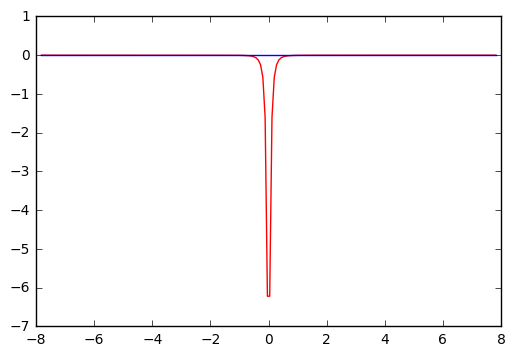

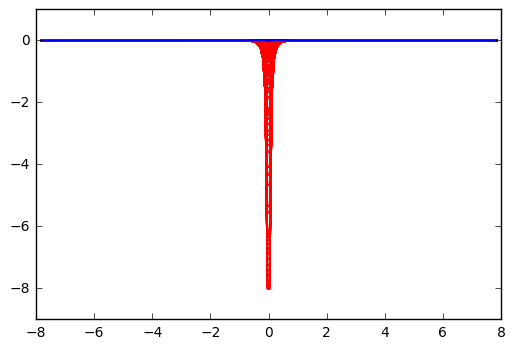

In [119]:

figure()
ik = 7
plot(ws,real(G[ik,ik,:,0,1]),'r')
plot(ws,imag(G[ik,ik,:,0,1]),'b')

figure()
for ik1 in range(Nk):
    for ik2 in range(Nk):
        plot(ws,real(G[ik1,ik2,:,0,1]),'r')
        plot(ws,imag(G[ik1,ik2,:,0,1]),'b')

In [120]:
data = load("../data/Sigma11.npy")
print shape(data)

(31L, 31L, 100L)


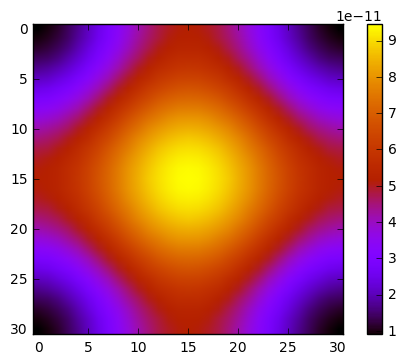

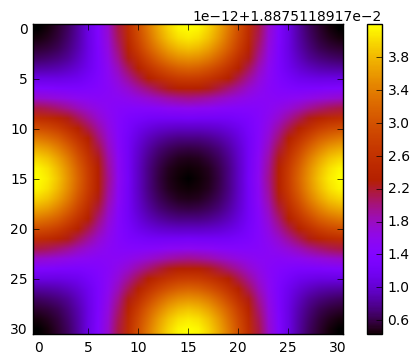

In [121]:
figure()
imshow(real(data[:,:,0]))
colorbar()
figure()
imshow(imag(data[:,:,0]))
colorbar()